In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
jtplot.style(figsize=(24, 9))

# VWAP. Volume-Weighted Average Price

In [18]:
df = pd.read_csv('../../../data/order_book/BAC.csv',
                 index_col=0, parse_dates=True)
df.head()

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-03-08 15:06:21.582,32.85,32.86,32.85,2101.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,400.0,Sell


In [19]:
df.shape

(100000, 5)

In [20]:
df['Volume'].is_monotonic_increasing

False

In [21]:
df.dtypes

Bid       float64
Ask       float64
Last      float64
Volume    float64
Type       object
dtype: object

In [22]:
df.index.inferred_type

'datetime64'

In [23]:
df.groupby('Type').count()

,Bid,Ask,Last,Volume
Type,,,,
Buy,61655,61655,61655,61655
Buy/Sell,91,91,91,91
Sell,38254,38254,38254,38254


In [24]:
df['price'] = df['Last'] * df['Volume']

In [25]:
df.head()

,Bid,Ask,Last,Volume,Type,price
Time,,,,,,
2023-03-08 15:06:21.582,32.85,32.86,32.85,2101.0,Sell,69017.85
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,400.0,Sell,13140.00


In [26]:
# VWAP = (Сумма (Цена * Объём) для каждой сделки) / (Суммарный объём за период)
df['price'].sum() / df['Volume'].sum()

32.52237099767282

In [27]:
df = df[df['Type']=='Buy'].copy()
df.drop('Type', axis=1, inplace=True)

In [31]:
df['CumulativePrice'] = df['price'].cumsum()
df['CumulativeVolume'] = df['Volume'].cumsum()
df['VWAP'] = df['CumulativePrice'] / df['CumulativeVolume']
df.head()

,Bid,Ask,Last,Volume,price,CumulativePrice,CumulativeVolume,VWAP
Time,,,,,,,,
2023-03-08 15:06:21.945,32.84,32.85,32.85,200.0,6570.00,6570.00,200.0,32.850000
2023-03-08 15:06:26.047,32.83,32.84,32.84,100.0,3284.00,9854.00,300.0,32.846667
2023-03-08 15:06:26.872,32.83,32.84,32.84,100.0,3284.00,13138.00,400.0,32.845000
2023-03-08 15:06:27.591,32.83,32.84,32.84,1601.0,52576.84,65714.84,2001.0,32.841000
2023-03-08 15:06:29.501,32.82,32.83,32.83,200.0,6566.00,72280.84,2201.0,32.840000


<AxesSubplot:xlabel='Time'>

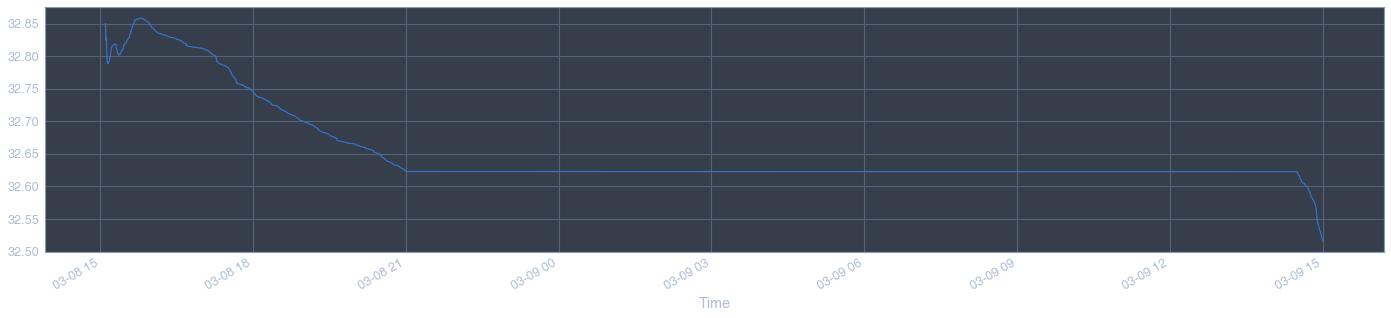

In [35]:
df['VWAP'].plot(figsize=(24, 5))

In [13]:
target_volume = 2 # lot
duration_sec = 30

start_time = df.loc['2023-03-08 15:06'].iloc[0].name
end_time = start_time + pd.Timedelta(seconds=30)

start_time, end_time

(Timestamp('2023-03-08 15:06:21.945000'),
 Timestamp('2023-03-08 15:06:51.945000'))

In [14]:
period_data = df.loc[
    (df.index>=start_time) &
    (df.index<=end_time)
].copy()

period_data.head()

,Bid,Ask,Last,Volume,price
Time,,,,,
2023-03-08 15:06:21.945,32.84,32.85,32.85,200.0,6570.00
2023-03-08 15:06:26.047,32.83,32.84,32.84,100.0,3284.00
2023-03-08 15:06:26.872,32.83,32.84,32.84,100.0,3284.00
2023-03-08 15:06:27.591,32.83,32.84,32.84,1601.0,52576.84
2023-03-08 15:06:29.501,32.82,32.83,32.83,200.0,6566.00


In [15]:
period_data['time_index'] = np.round((period_data.index-start_time).total_seconds(), 3)

period_data.head()

,Bid,Ask,Last,Volume,price,time_index
Time,,,,,,
2023-03-08 15:06:21.945,32.84,32.85,32.85,200.0,6570.00,0.000
2023-03-08 15:06:26.047,32.83,32.84,32.84,100.0,3284.00,4.102
2023-03-08 15:06:26.872,32.83,32.84,32.84,100.0,3284.00,4.927
2023-03-08 15:06:27.591,32.83,32.84,32.84,1601.0,52576.84,5.646
2023-03-08 15:06:29.501,32.82,32.83,32.83,200.0,6566.00,7.556
